In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Import Dataset From Cloud Storage

In [4]:
import google.datalab.storage as storage
from io import BytesIO
my_bucket = storage.Bucket('earnings_data')
women_degree_csv = my_bucket.object('percent-bachelors-degrees-women-usa.csv')
uri = women_degree_csv.uri
%gcs read --object $uri --variable data
women_degrees = pd.read_csv(BytesIO(data))

In [7]:
women_degrees.head(12)

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3
5,1975,18.333162,19.134048,60.9,34.449902,19.686249,41.5,19.8,72.801854,3.2,61.647206,75.0,78.9,40.7,19.1,54.5,63.0,37.7
6,1976,22.252760,21.394491,61.3,36.072871,23.430038,44.3,23.9,72.166525,4.5,62.148194,74.4,79.2,41.5,20.0,56.9,65.6,39.2
7,1977,24.640177,23.740541,62.0,38.331386,27.163427,46.9,25.7,72.456395,6.8,62.723067,74.3,80.5,41.1,21.3,59.0,69.3,40.5
8,1978,27.146192,25.849240,62.5,40.112496,30.527519,49.9,28.1,73.192821,8.4,63.619122,74.3,81.9,41.6,22.5,61.3,71.5,41.8
9,1979,29.633365,27.770477,63.2,42.065551,33.621634,52.3,30.2,73.821142,9.4,65.088390,74.2,82.3,42.3,23.7,63.3,73.3,43.6


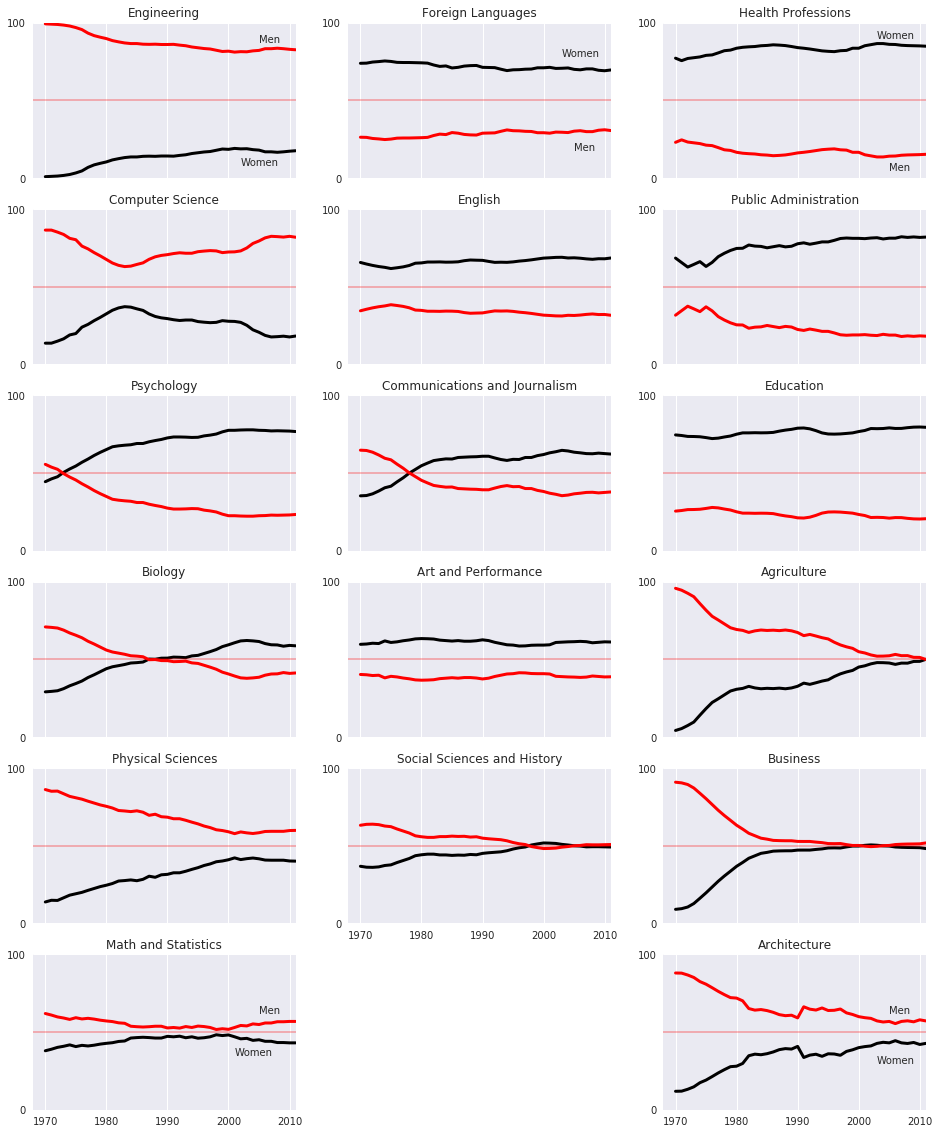

In [13]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']
fig = plt.figure(figsize=(16, 20))

for sp in range(0,18,3):
    cat_index = int(sp/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/171,171/255, 171/255),alpha=0.3)
    
    if cat_index == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
        ax.tick_params(labelbottom='on')
for sp in range(1,16,3):
    cat_index = int((sp-1)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[cat_index]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[cat_index])
    ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/171,171/255, 171/255),alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    elif cat_index == 4:
        ax.tick_params(labelbottom='on')
        
for sp in range(2,20,3):
    cat_index = int((sp-2)/3)
    ax = fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[cat_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[cat_index]], c=cb_orange, label="Men", linewidth=3)
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[cat_index])
    ax.tick_params(bottom='off', top='off', left='off', right='off', labelbottom='off')
    ax.set_yticks([0,100])
    ax.axhline(50, c=(171/171,171/255, 171/255),alpha=0.3)
    
    if cat_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif cat_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')
   
plt.show()

In [14]:
plt.savefig('gender_degrees')